In [10]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import src.modules as modules

In [11]:
%load_ext autoreload
%autoreload 2

## Import of NeoLetExe metadata and rna data

In [12]:
NeoLet_md = pd.read_csv("/data/severs/NeoLet_metadata.csv")

In [13]:
NeoLet_md = NeoLet_md.set_index("Unnamed: 0")
NeoLet_md.index.name = "Cell_name"

In [14]:
NeoLet_md.head()

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,TCR_clonotype_id,TCR_chain,TCR_v_gene,TCR_j_gene,TCR_c_gene,TCR_caten,...,Time_point,Trial,patient_number,RNA_snn_res.0.8,seurat_clusters,RNA_snn_res.1,RNA_snn_res.1.2,main.ids,UMAP_1,UMAP_2
Cell_name,,,,,,,,,,,,,,,,,,,,,
NL67A_AAACCTGAGAGTGAGA-1,NL67A,2404,335,1.747088,NaN,NaN,NaN,NaN,NaN,NaN,...,Baseline,NeoLetExe,67,13,14,14,14,B-cells,-2.918619,2.661493
NL67A_AAACCTGAGTGTACGG-1,NL67A,13687,2937,4.683276,NaN,NaN,NaN,NaN,NaN,NaN,...,Baseline,NeoLetExe,67,24,29,27,29,Fibroblasts,5.511472,-3.090267
NL67A_AAACCTGCAAGAAAGG-1,NL67A,2239,973,6.163466,NL67_clonotype1315,"TRA, TRA, TRB","TRAV38-1, TRAV13-2, TRBV27","TRAJ20, TRAJ45, TRBJ2-1","TRAC, TRAC, TRBC2","TRA_true, TRA_true, TRB_true",...,Baseline,NeoLetExe,67,2,1,1,1,T- & NK-cells,1.437860,8.561169
NL67A_AAACCTGCAAGCCGCT-1,NL67A,2904,1216,7.265840,NL67_clonotype1620,TRB,TRBV2,TRBJ2-7,TRBC2,TRB_true,...,Baseline,NeoLetExe,67,2,1,1,1,T- & NK-cells,2.160000,9.716837
NL67A_AAACCTGCAATCTACG-1,NL67A,2153,871,10.450534,NL67_clonotype1751,"TRB, TRA","TRBV6-5, TRAV17","TRBJ1-6, TRAJ34","TRBC1, TRAC","TRB_true, TRA_true",...,Baseline,NeoLetExe,67,5,3,4,3,T- & NK-cells,1.543692,6.254557


Importing expression data for baseline, 2months and 4months. 

In [15]:
baseline = pd.read_pickle("/data/severs/reduced_data_sets/Cancer_baseline.pkl")

In [16]:
md2 = pd.read_pickle("/data/severs/reduced_data_sets/Cancer_2mnd.pkl")

In [17]:
md4 = pd.read_pickle("/data/severs/reduced_data_sets/Cancer_4mnd.pkl")

In [18]:
baseline.index = NeoLet_md.index[list(baseline.index)]

In [19]:
md2.index = NeoLet_md.index[list(md2.index)]

In [20]:
md4.index = NeoLet_md.index[list(md4.index)]

In [21]:
NeoLet_md["ESR1"] = [float("nan")]*94231

In [22]:
NeoLet_md.loc[baseline.index]["ESR1"] = baseline["ESR1"].values

In [23]:
NeoLet_md["ESR1"].loc[md2.index] = md2["ESR1"].values


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [24]:
NeoLet_md["ESR1"].loc[md4.index] = md4["ESR1"].values

## Patient specific investigation
Below the plot shows how a single patient's cells overlaps with the others in the UMAP clustering. There is significant overlap between patients suggesting similarities between them. 

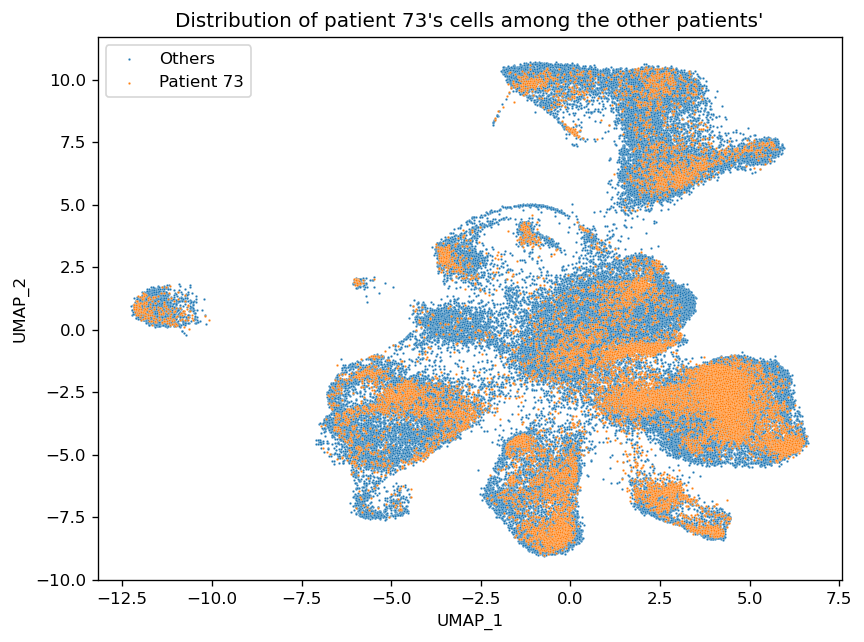

In [25]:
fig, ax = plt.subplots(1,1, figsize=(8,6), dpi=120)
p = 73
sns.scatterplot(data=NeoLet_md[NeoLet_md.patient_number!=p], x="UMAP_1", y="UMAP_2", s=2, label="Others")
sns.scatterplot(data=NeoLet_md[NeoLet_md.patient_number==p], x="UMAP_1", y="UMAP_2", s=2, label=f"Patient {p}")
plt.legend()
plt.title(f"Distribution of patient {p}'s cells among the other patients'")
plt.show()

## Investigation of between patient differenes

Text(0, 0.5, 'n cells')

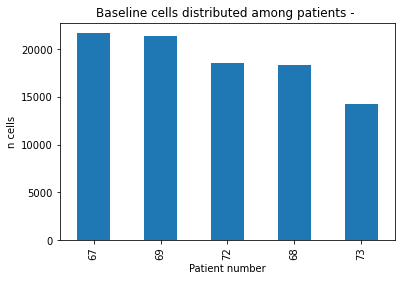

In [26]:
%matplotlib inline
NeoLet_md["patient_number"].value_counts().plot(kind="bar")
plt.title("Baseline cells distributed among patients - ")
plt.xlabel("Patient number")
plt.ylabel("n cells")

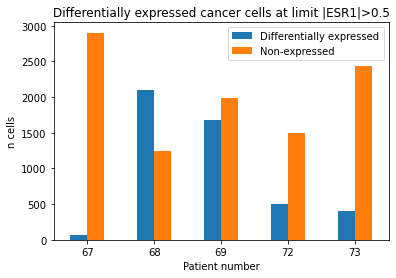

In [27]:

diff_exp = NeoLet_md[NeoLet_md["ESR1"].abs()>0.5]["patient_number"].loc[NeoLet_md["main.ids"].isin(["Cancer cells", "Cancer cells ?"])].value_counts()
non_exp = NeoLet_md[NeoLet_md["ESR1"].abs()<0.5]["patient_number"].loc[NeoLet_md["main.ids"].isin(["Cancer cells", "Cancer cells ?"])].value_counts()

exp_count = pd.DataFrame({"Differentially expressed":diff_exp, "Non-expressed":non_exp})
ax = exp_count.plot.bar(rot=0)
plt.title("Differentially expressed cancer cells at limit |ESR1|>0.5")
plt.xlabel("Patient number")
plt.ylabel("n cells")
plt.show()

### Violin plots

These show the distribution of ESR1 expressions among patients. There is a bug for the NeoLetExe set where the baseline does not show that recently occured. Correct plot in `progress_report.md`

TODO: 
- Fix bug where Baseline time point does not show. 
- Find out how to show striplot for each of the three columns for each patient (now the points for all show on the centre plot)

In [28]:
patients = {}
patient_numbers = [67, 68, 69, 72, 73]
for pn in patient_numbers:
    patients[pn] = {"baseline": NeoLet_md.loc[baseline.index].loc[NeoLet_md["patient_number"] == pn], 
                    "2mnd": NeoLet_md.loc[md2.index].loc[NeoLet_md["patient_number"] == pn],
                    "4mnd": NeoLet_md.loc[md4.index].loc[NeoLet_md["patient_number"] == pn]}
                    

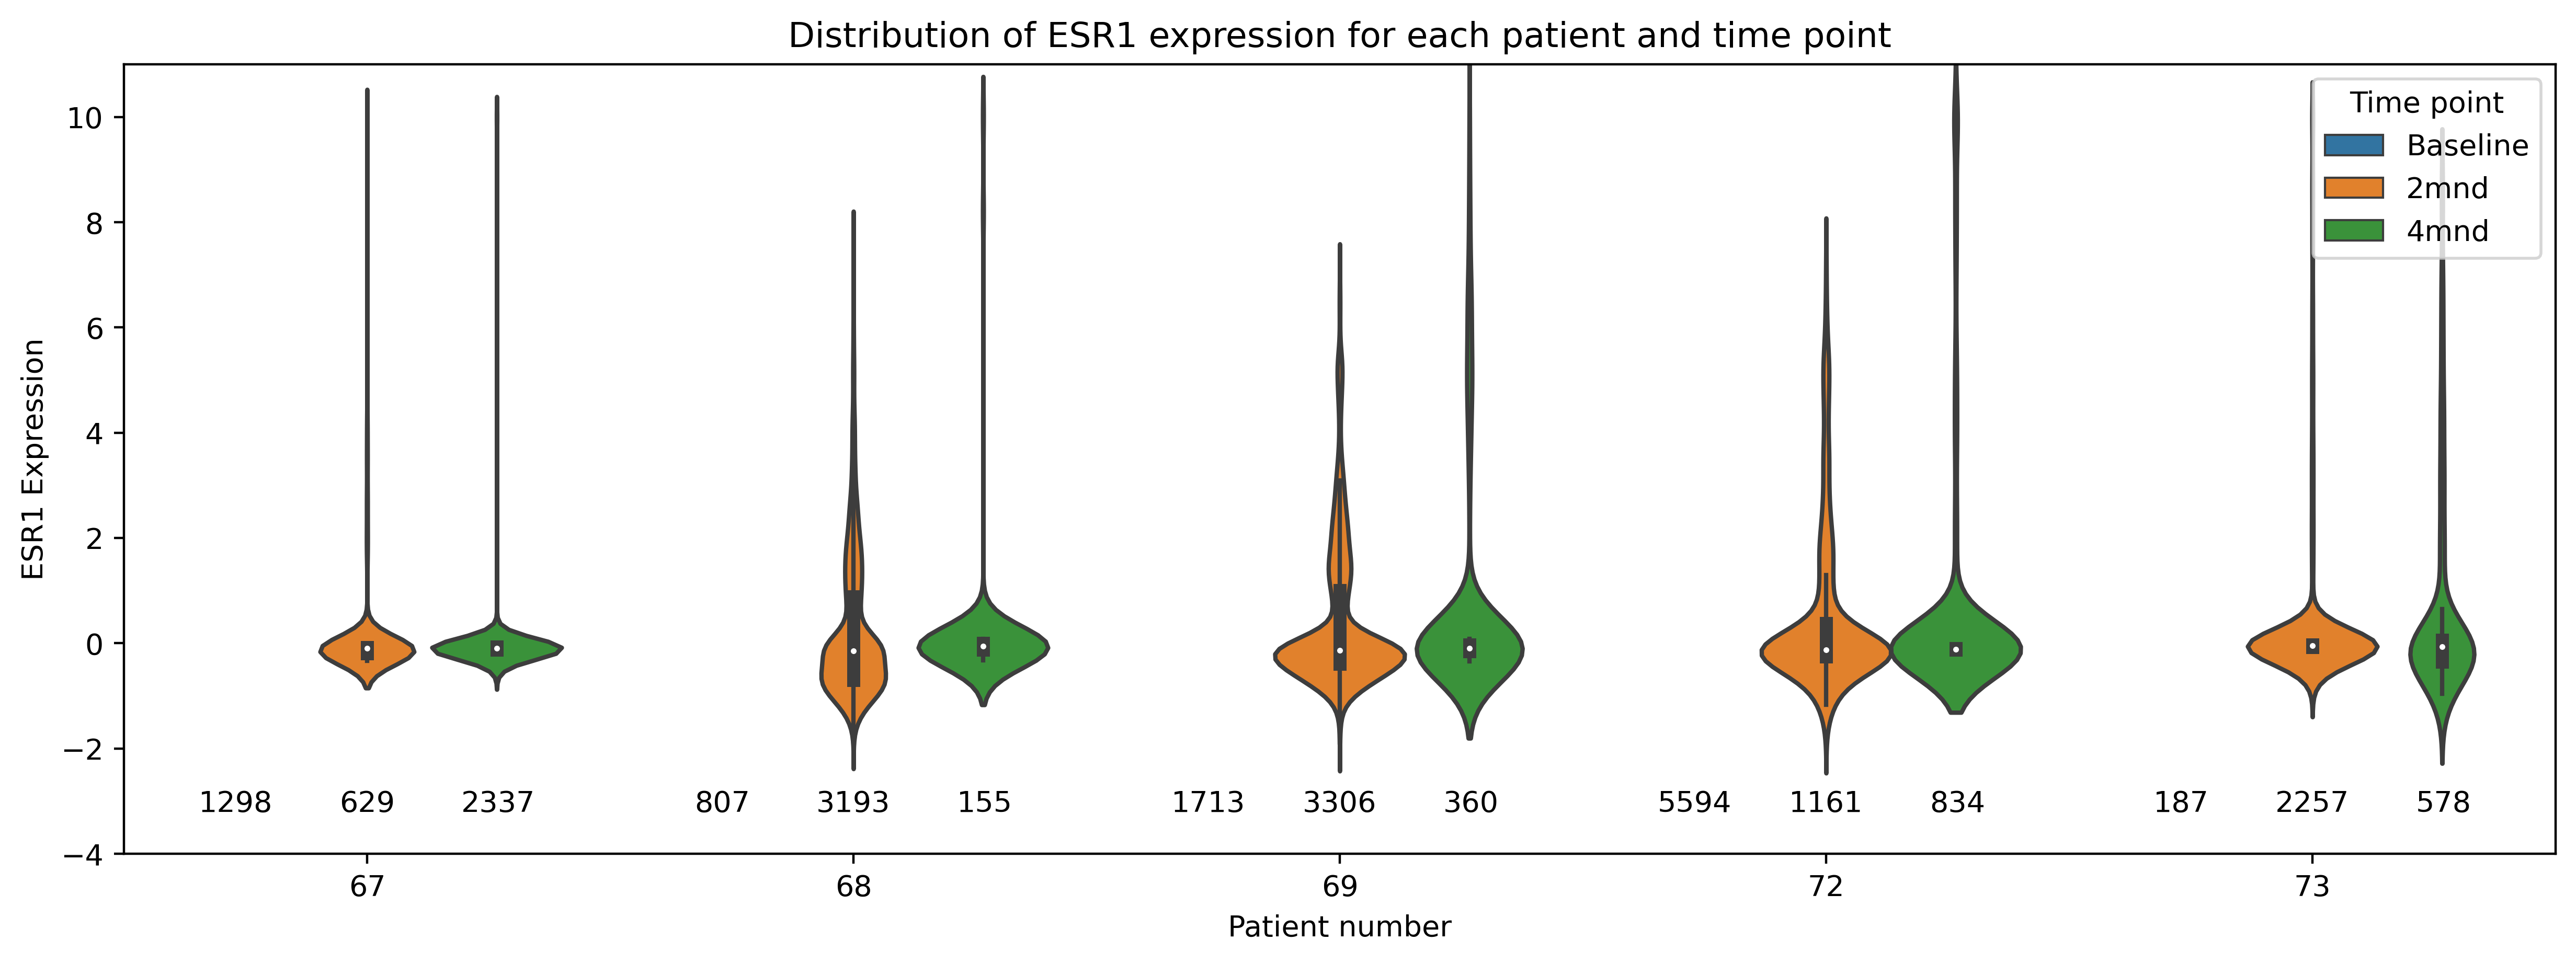

In [29]:
fig, ax = plt.subplots(1,1, dpi=400, figsize=(15,5))
ax = sns.violinplot(x="patient_number", y="ESR1", hue="Time_point", data=NeoLet_md)
ax.set_xlabel("Patient number")
ax.set_ylabel("ESR1 Expression")
plt.legend(title="Time point")
ax.set_title("Distribution of ESR1 expression for each patient and time point")
ax.set_ylim(-4,11)

for x, pn in enumerate(NeoLet_md.patient_number.unique()):
    n = NeoLet_md[NeoLet_md.Time_point=="Baseline"].loc[NeoLet_md["main.ids"].isin(["Cancer cells", "Cancer cells ?"])].patient_number.value_counts()[pn]
    plt.text(x-0.27, -3.2, f"{n}",horizontalalignment='center')
    n = NeoLet_md[NeoLet_md.Time_point=="2mnd"].loc[NeoLet_md["main.ids"].isin(["Cancer cells", "Cancer cells ?"])].patient_number.value_counts()[pn]
    plt.text(x, -3.2, f"{n}",horizontalalignment='center')
    n = NeoLet_md[NeoLet_md.Time_point=="4mnd"].loc[NeoLet_md["main.ids"].isin(["Cancer cells", "Cancer cells ?"])].patient_number.value_counts()[pn]
    plt.text(x+0.27, -3.2, f"{n}",horizontalalignment='center')

#plt.savefig("/home/severs/SingleCells/plots/violin_NeoLet.png")
plt.show()

## Import data from the first data set, rna and metdata

In [41]:
oldset_md = pd.read_csv("/data/xiaoral/rna_metadata.csv")

In [42]:
oldset_md = oldset_md.drop(["CellFromTumor", "TumorType", "TumorSite"], axis=1)

In [43]:
oldset = pd.read_pickle("/data/severs/full_data_Sets/Cancer.pkl")

In [101]:
pns = oldset_md[oldset_md.CellType=="Cancer"].PatientNumber.values

In [103]:
oldset.shape

(16235, 28635)

In [111]:
for p in oldset_md.PatientNumber.unique():
    nans = oldset[pns==p].dropna(axis=1).shape
    partial_genes = (oldset[pns==p].isna().sum()==nans[0]).sum() + (oldset[pns==p].isna().sum()==0).sum()
    print(f"Patient {p} has {nans}")
    print(f"    Partial_genes = {28635-partial_genes}")

Patient 41 has (361, 23443)
    Partial_genes = 0
Patient 42 has (2488, 22053)
    Partial_genes = 0
Patient 43 has (549, 22569)
    Partial_genes = 0
Patient 44 has (879, 22087)
    Partial_genes = 0
Patient 45 has (863, 23050)
    Partial_genes = 0
Patient 46 has (51, 17192)
    Partial_genes = 0
Patient 47 has (1348, 21172)
    Partial_genes = 0
Patient 48 has (668, 21028)
    Partial_genes = 0
Patient 49 has (1965, 23606)
    Partial_genes = 0
Patient 50 has (112, 18314)
    Partial_genes = 0
Patient 51 has (2300, 23600)
    Partial_genes = 0
Patient 52 has (67, 16620)
    Partial_genes = 0
Patient 53 has (755, 21880)
    Partial_genes = 0
Patient 54 has (3829, 22827)
    Partial_genes = 0


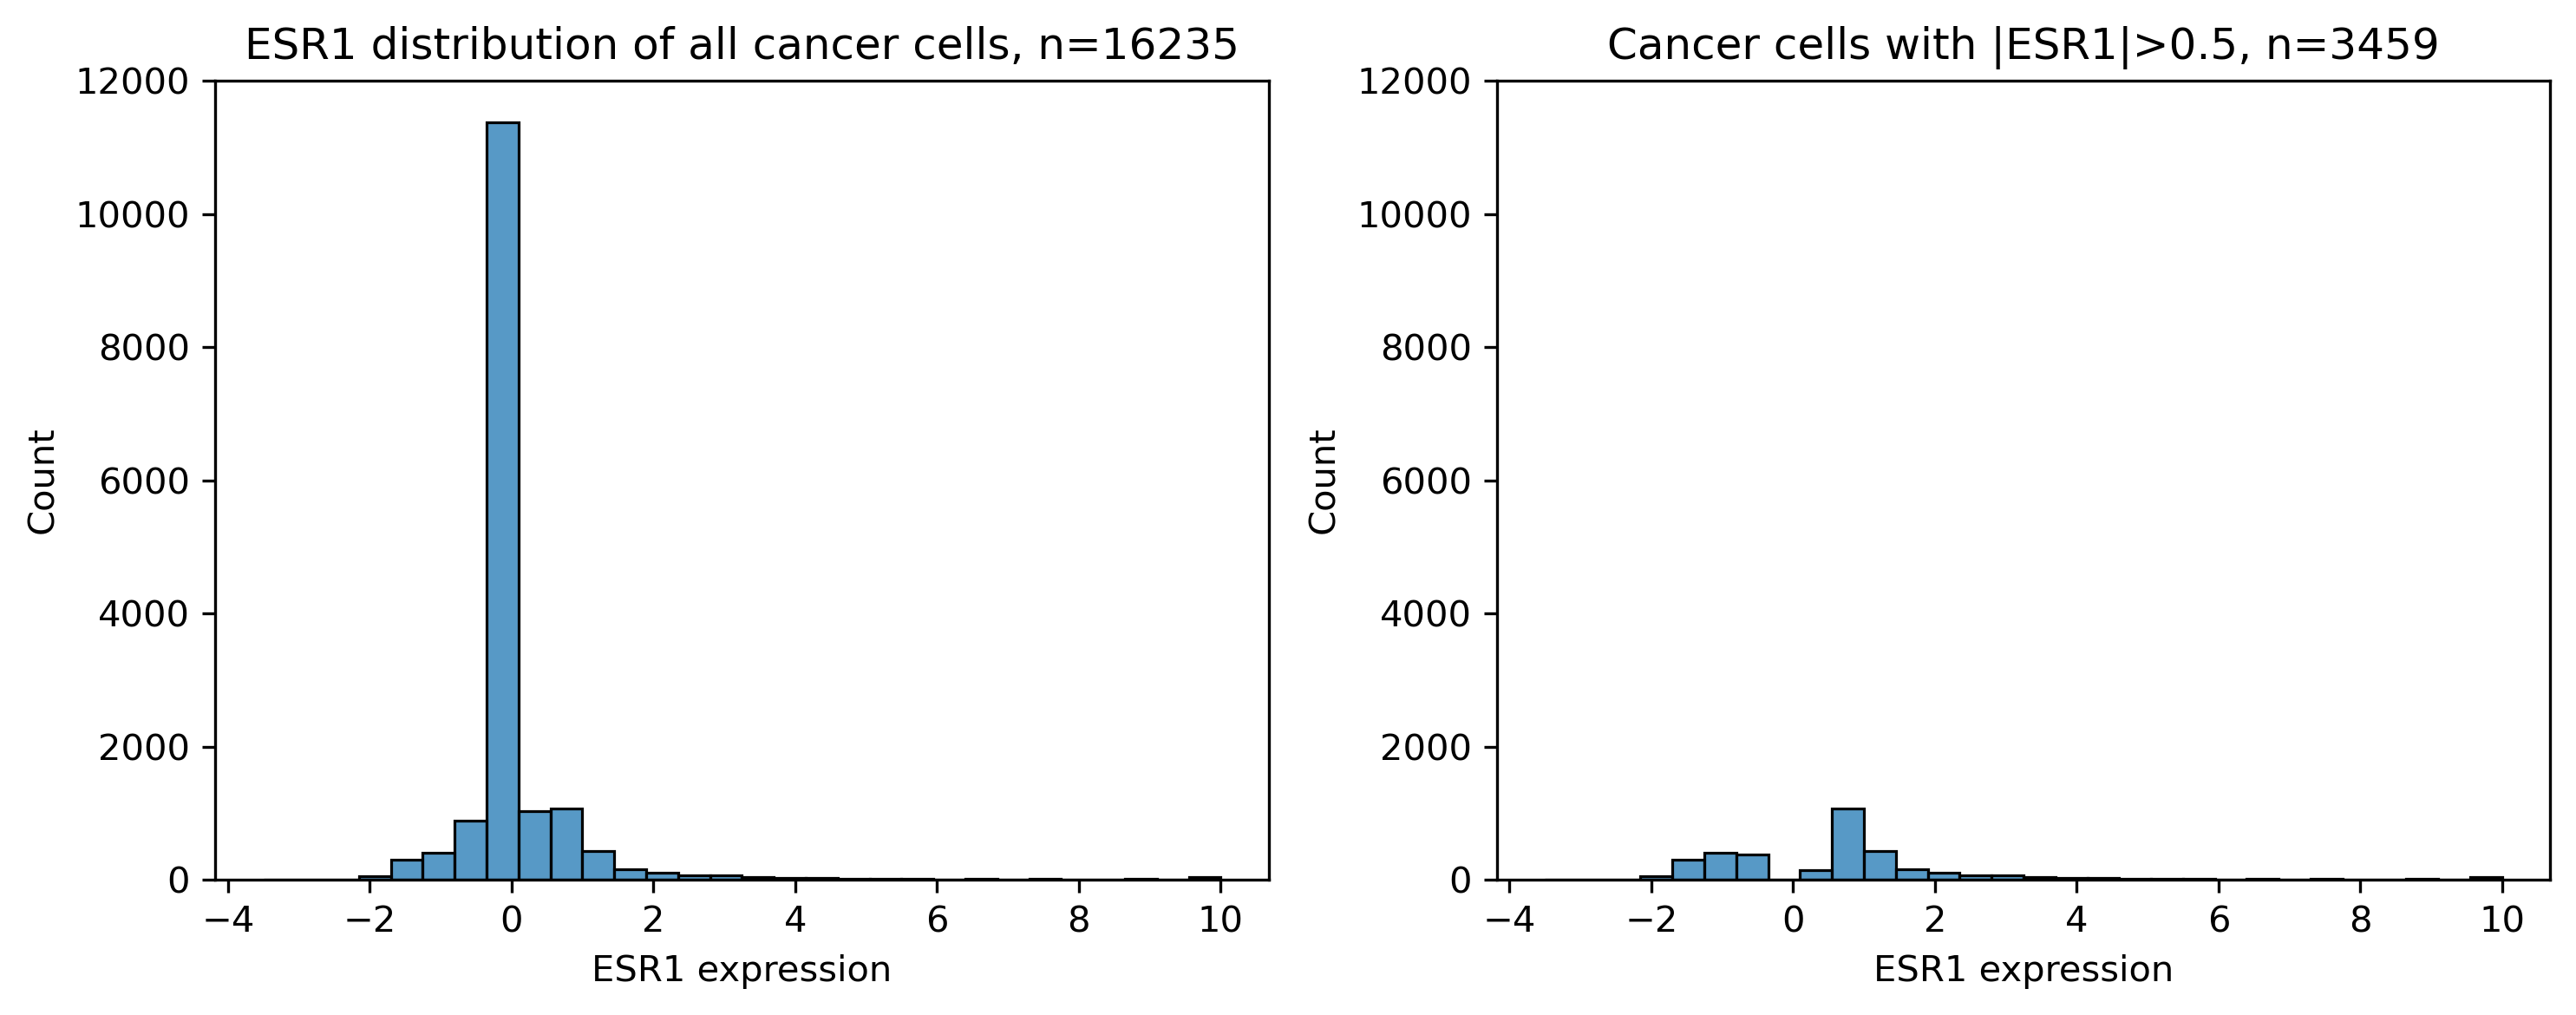

In [136]:
fig, ax = plt.subplots(1,2,dpi=300, figsize=(10,4))
sns.histplot(oldset.ESR1, bins=30, ax=ax[0])
ax[0].set_title("ESR1 distribution of all cancer cells, n=16235")
ax[0].set_xlabel("ESR1 expression")
ax[0].set_ylim((0,12000))
sns.histplot(oldset[oldset.ESR1.abs()>0.5].ESR1, bins=30, ax=ax[1])
ax[1].set_title("Cancer cells with |ESR1|>0.5, n=3459")
ax[1].set_ylim((0,12000))
ax[1].set_xlabel("ESR1 expression")
fig.tight_layout()
plt.savefig("/home/severs/SingleCells/plots/esr1_distribution.png")

In [ ]:
(oldset[pns==p].isna().sum()==nans[1]).sum() + (oldset[pns==p].isna().sum()==0).sum()

In [106]:

(oldset[pns==p].isna().sum()==3829).sum() + (oldset[pns==p].isna().sum()==0).sum()

28635

<AxesSubplot:xlabel='Genes'>

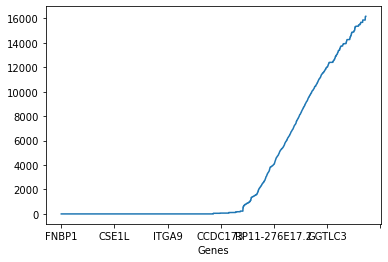

In [90]:
oldset.isna().sum().sort_values().plot()

In [44]:
oldset_md["ESR1"] = [float("nan")]*len(oldset_md)

In [59]:
oldset_md.loc[oldset_md.CellType=="Cancer","ESR1"] = oldset["ESR1"].values

### Violin plot

In [66]:
oldset_md.head()

,Unnamed: 0,Cell,nGene,nUMI,PatientNumber,CellType,ESR1
0,1,sc5rJUQ024_AAACCTGCAACAACCT,894,1624,41,DC,NaN
1,2,sc5rJUQ024_AAACCTGCAAGAAGAG,1401,2983,41,T_cell,NaN
2,3,sc5rJUQ024_AAACCTGGTCTCCACT,585,1141,41,Cancer,-0.05237
3,4,sc5rJUQ024_AAACCTGTCAACGAAA,4233,18953,41,Myeloid,NaN
4,5,sc5rJUQ024_AAACGGGAGAGTAAGG,1669,3794,41,Fibroblast,NaN


16235


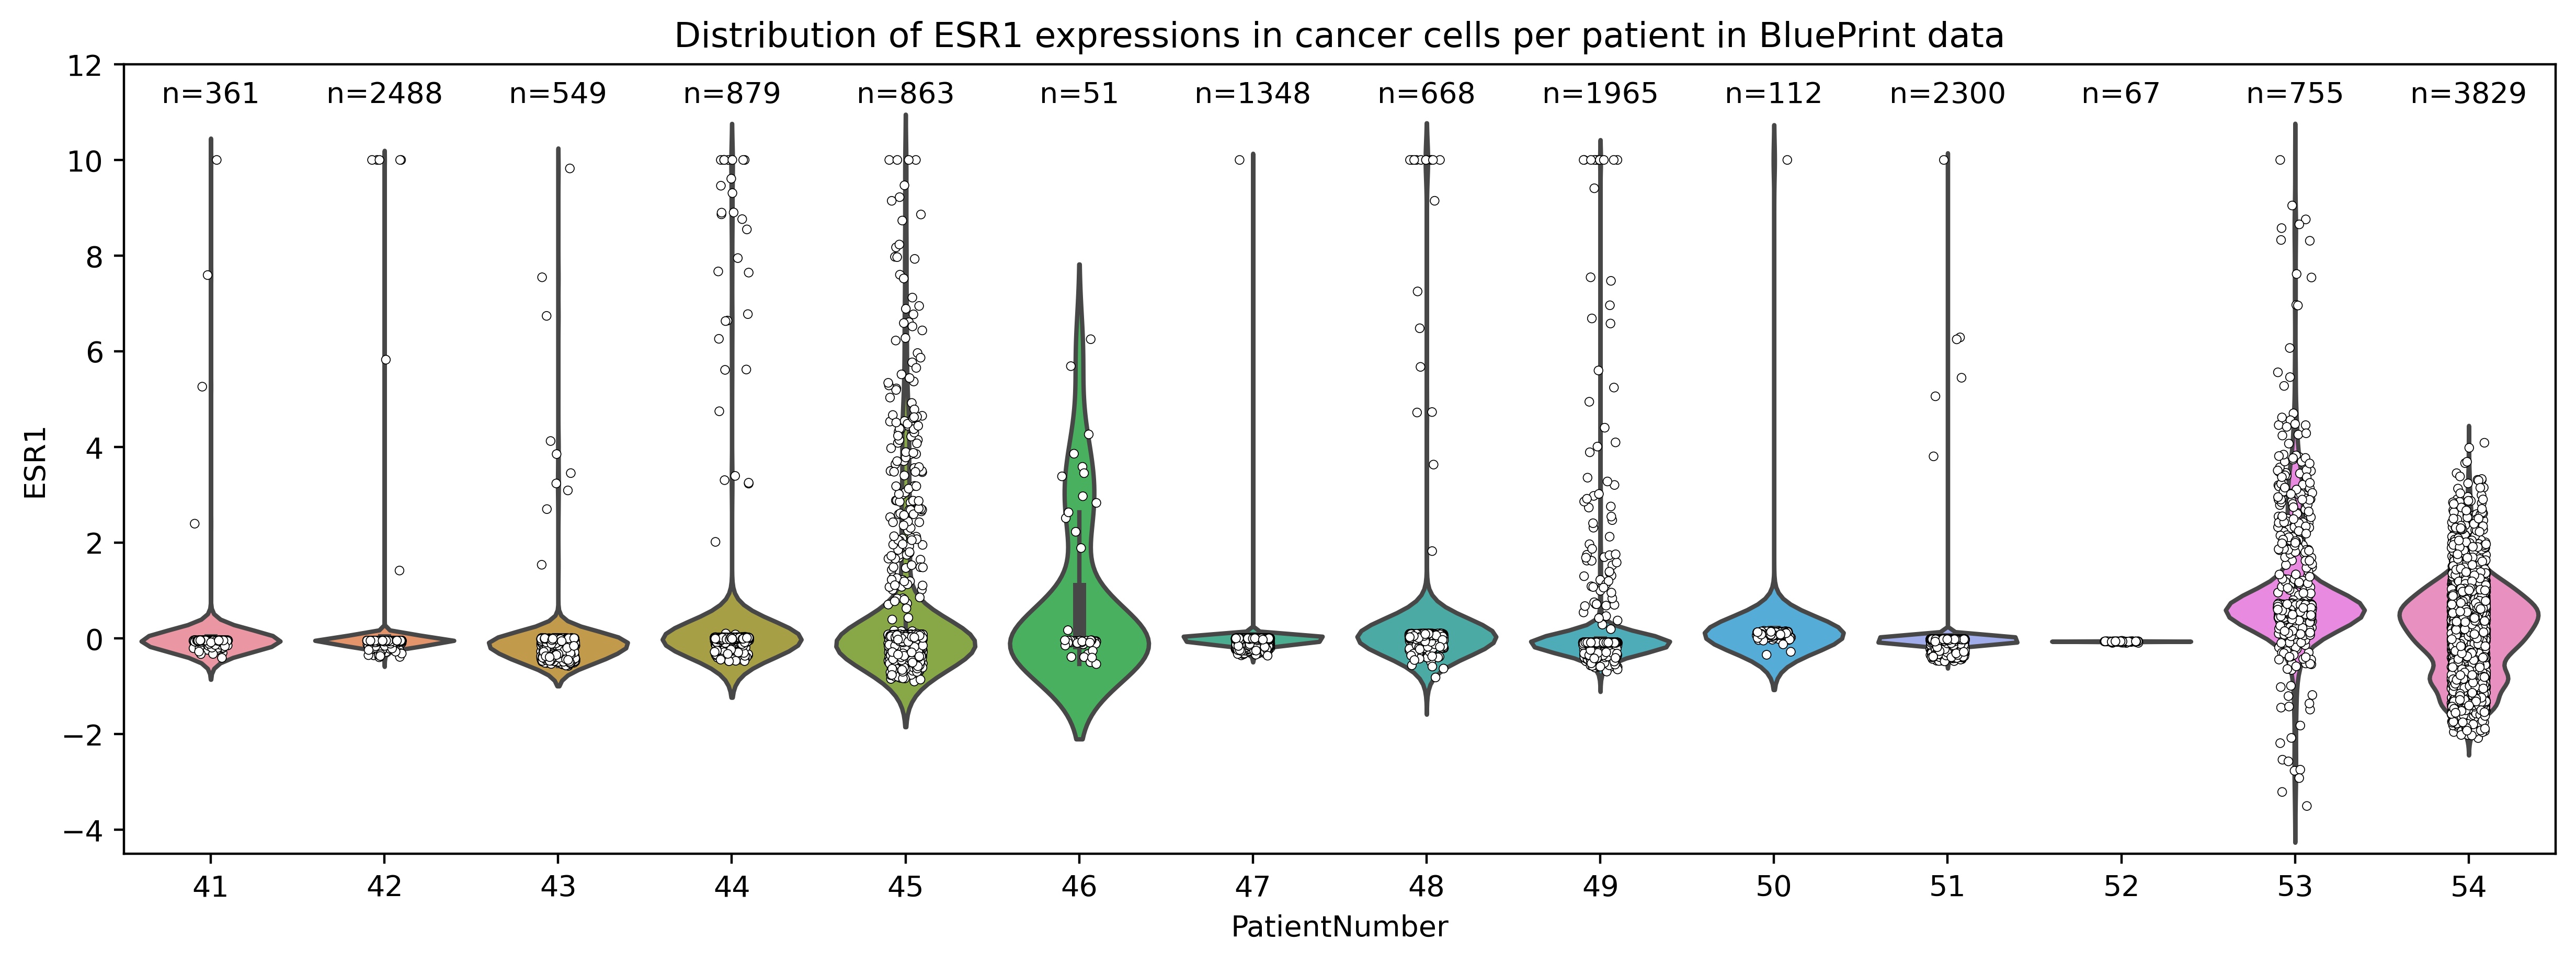

In [76]:
fig, ax = plt.subplots(1,1, dpi=400, figsize=(15,5))
ax = sns.violinplot(x="PatientNumber", y="ESR1", data=oldset_md, scale="width")
ax.set_xlabel("Patient number")
ax.set_ylabel("ESR1 Expression")
ax.set_title("Distribution of ESR1 expressions in cancer cells per patient in BluePrint data")
ax.set_ylim(-4.5, 12)
ax = sns.stripplot(data=oldset_md, x='PatientNumber', y='ESR1',
                   color=("white"), edgecolor="black", linewidth=0.3, ax=ax, s=3)
s = 0
for pn in oldset_md.PatientNumber.unique():
    n = oldset_md[oldset_md.CellType=="Cancer"].PatientNumber.value_counts()[pn]
    plt.text(pn-41, 11.2, f"n={n}",horizontalalignment='center')
    s += n
print(s)
plt.savefig("/home/severs/SingleCells/plots/violin_oldset.png")
plt.show()

# Training on entire old dataset

In [68]:
import xgboost as xgb
import src.modules as modules
from src.modules import Data

In [7]:
model = xgb.XGBRegressor()

In [8]:
y = oldset.ESR1

In [11]:
X = oldset.drop("ESR1", axis=1)

In [12]:
nan_of = X.isna().sum() > len(X)*0.2

In [13]:
X = X.drop(nan_of.index[nan_of], axis=1)

#### One-hot-encode patient number

In [ ]:
X["PatientNumber"] = oldset_mdESR1[oldset_mdESR1["CellType"]=="Cancer"].PatientNumber

In [ ]:
PNs = pd.get_dummies(X.PatientNumber)

In [ ]:
newcols = []
for i, c in enumerate(PNs.columns):
    newcols.append("p"+str(c))

In [ ]:
PNs.columns = newcols

In [ ]:
X.drop("PatientNumber", axis=1, inplace=True)

In [ ]:
X[PNs.columns] = PNs

#### Choose input variables

In [29]:
from random import sample, seed, shuffle

In [15]:
from tqdm.notebook import tqdm
import scipy
def compute_p_value(X, y):
    diff_lim = 0.5
    df = X[y.abs()>diff_lim]
    target_col = y[y.abs()>diff_lim]
    
    n_row = len(df)
    n_col = len(df.columns)
    correlation = np.empty(n_col)
    p_value = np.zeros(n_col)
    
    for i in tqdm(range(n_col)):
        non_nan_count = n_row-df[df.columns[i]].isna().sum()
        correlation[i] = target_col.corr(df[df.columns[i]])
        t = correlation[i] * np.sqrt(non_nan_count-2) / np.sqrt(1 - correlation[i]**2) # t-test
        p_value[i] = scipy.stats.t.sf(abs(t), non_nan_count-2)*2
        
    return p_value, correlation

In [156]:
def sort_inputs(X, y, p=0.01):
    pvalues, correlations = compute_p_value(X, y)
    df = pd.DataFrame()
    df["Correlation"] = correlations
    df["pvalues"] = pvalues
    df.index = X.columns
    inputs = list(df.index[(df["pvalues"]<p)]) + list(X.columns[-14:])
    inputs = list(set(inputs))
    print("n inputs ", len(inputs))
    return df

In [6]:
df_corr = select_inputs(X[y>0.5], y[y>0.1], p=0.00000000000000001)

NameError: name 'select_inputs' is not defined

In [193]:
inputs = df_corr.sort_values('pvalues', ascending=False).index[:50]

#### Include all datapoints but add weigths to diff exp

In [181]:
weights = (abs(y)>0.5).values.astype(float)
weights[weights<1] += 0.25
weights *= 10

Set up dataset

In [194]:
oldset = Data(X[y>0.1][inputs], y[y>0.1], weights=None)

In [ ]:
oldset.set_weights(weights)

In [79]:
len(np.where(abs(y)>0.5)[0])

3459

In [183]:
seed(10)
train = sample(list(range(len(y[y>0.1]))), int(0.8*len(y[y>0.1])))
test = list(set(range(len(y[y>0.1])))-set(train))

In [87]:
train = sample(list(np.where(abs(y)>0.5)[0]), int(0.8*len(np.where(abs(y)>0.5)[0])))
test = list(set(np.where(abs(y)>0.5)[0])-set(train))

train+= sample(list(np.where(abs(y)<0.5)[0]), int(0.8*len(np.where(abs(y)<0.5)[0])))
test += list(set(np.where(abs(y)<0.5)[0])-set(train))

In [94]:
type(train)

list

In [196]:
oldset.split_data(train, test)

In [197]:
params = {
    "max_depth" :  3,
    "min_child_weight": 1,
    "subsample" : 0.8,
    "eta" : 0.02,
    "n_jobs" : 60,
    "n_estimators" : 1000
}

In [198]:
full_model = xgb.XGBRegressor(**params)

In [199]:
history = full_model.fit(oldset.X_train, oldset.y_train,
                         #sample_weight=oldset.weights_train,
                         eval_set=[(oldset.X_test, oldset.y_test)])

[0]	validation_0-rmse:1.98357
[1]	validation_0-rmse:1.96232
[2]	validation_0-rmse:1.94294
[3]	validation_0-rmse:1.92318
[4]	validation_0-rmse:1.90411
[5]	validation_0-rmse:1.88584
[6]	validation_0-rmse:1.86708
[7]	validation_0-rmse:1.85267
[8]	validation_0-rmse:1.83426
[9]	validation_0-rmse:1.81772
[10]	validation_0-rmse:1.80123
[11]	validation_0-rmse:1.78668
[12]	validation_0-rmse:1.77604
[13]	validation_0-rmse:1.76097
[14]	validation_0-rmse:1.74645
[15]	validation_0-rmse:1.73316
[16]	validation_0-rmse:1.71940
[17]	validation_0-rmse:1.70636
[18]	validation_0-rmse:1.69298
[19]	validation_0-rmse:1.68118
[20]	validation_0-rmse:1.67130
[21]	validation_0-rmse:1.66183
[22]	validation_0-rmse:1.65389
[23]	validation_0-rmse:1.64521
[24]	validation_0-rmse:1.63332
[25]	validation_0-rmse:1.62359
[26]	validation_0-rmse:1.61501
[27]	validation_0-rmse:1.60335
[28]	validation_0-rmse:1.59211
[29]	validation_0-rmse:1.58032
[30]	validation_0-rmse:1.57205
[31]	validation_0-rmse:1.56193
[32]	validation_0-

[260]	validation_0-rmse:1.07808
[261]	validation_0-rmse:1.07562
[262]	validation_0-rmse:1.07579
[263]	validation_0-rmse:1.07432
[264]	validation_0-rmse:1.07274
[265]	validation_0-rmse:1.07254
[266]	validation_0-rmse:1.07178
[267]	validation_0-rmse:1.07164
[268]	validation_0-rmse:1.07179
[269]	validation_0-rmse:1.07205
[270]	validation_0-rmse:1.07172
[271]	validation_0-rmse:1.07221
[272]	validation_0-rmse:1.07217
[273]	validation_0-rmse:1.07239
[274]	validation_0-rmse:1.07247
[275]	validation_0-rmse:1.07100
[276]	validation_0-rmse:1.07109
[277]	validation_0-rmse:1.07078
[278]	validation_0-rmse:1.07136
[279]	validation_0-rmse:1.07134
[280]	validation_0-rmse:1.07144
[281]	validation_0-rmse:1.07102
[282]	validation_0-rmse:1.07093
[283]	validation_0-rmse:1.06974
[284]	validation_0-rmse:1.07005
[285]	validation_0-rmse:1.07061
[286]	validation_0-rmse:1.07032
[287]	validation_0-rmse:1.07010
[288]	validation_0-rmse:1.07021
[289]	validation_0-rmse:1.06865
[290]	validation_0-rmse:1.06827
[291]	va

[517]	validation_0-rmse:1.04911
[518]	validation_0-rmse:1.04903
[519]	validation_0-rmse:1.04894
[520]	validation_0-rmse:1.04886
[521]	validation_0-rmse:1.04889
[522]	validation_0-rmse:1.04916
[523]	validation_0-rmse:1.04934
[524]	validation_0-rmse:1.04935
[525]	validation_0-rmse:1.04943
[526]	validation_0-rmse:1.04945
[527]	validation_0-rmse:1.04994
[528]	validation_0-rmse:1.04910
[529]	validation_0-rmse:1.04920
[530]	validation_0-rmse:1.04883
[531]	validation_0-rmse:1.04909
[532]	validation_0-rmse:1.04889
[533]	validation_0-rmse:1.04885
[534]	validation_0-rmse:1.04854
[535]	validation_0-rmse:1.04844
[536]	validation_0-rmse:1.04891
[537]	validation_0-rmse:1.04857
[538]	validation_0-rmse:1.04863
[539]	validation_0-rmse:1.04824
[540]	validation_0-rmse:1.04840
[541]	validation_0-rmse:1.04841
[542]	validation_0-rmse:1.04850
[543]	validation_0-rmse:1.04862
[544]	validation_0-rmse:1.04868
[545]	validation_0-rmse:1.04863
[546]	validation_0-rmse:1.04872
[547]	validation_0-rmse:1.04866
[548]	va

[774]	validation_0-rmse:1.04415
[775]	validation_0-rmse:1.04366
[776]	validation_0-rmse:1.04300
[777]	validation_0-rmse:1.04321
[778]	validation_0-rmse:1.04346
[779]	validation_0-rmse:1.04359
[780]	validation_0-rmse:1.04370
[781]	validation_0-rmse:1.04362
[782]	validation_0-rmse:1.04309
[783]	validation_0-rmse:1.04311
[784]	validation_0-rmse:1.04301
[785]	validation_0-rmse:1.04295
[786]	validation_0-rmse:1.04295
[787]	validation_0-rmse:1.04308
[788]	validation_0-rmse:1.04299
[789]	validation_0-rmse:1.04307
[790]	validation_0-rmse:1.04284
[791]	validation_0-rmse:1.04281
[792]	validation_0-rmse:1.04284
[793]	validation_0-rmse:1.04284
[794]	validation_0-rmse:1.04298
[795]	validation_0-rmse:1.04291
[796]	validation_0-rmse:1.04320
[797]	validation_0-rmse:1.04319
[798]	validation_0-rmse:1.04257
[799]	validation_0-rmse:1.04231
[800]	validation_0-rmse:1.04223
[801]	validation_0-rmse:1.04205
[802]	validation_0-rmse:1.04178
[803]	validation_0-rmse:1.04168
[804]	validation_0-rmse:1.04154
[805]	va

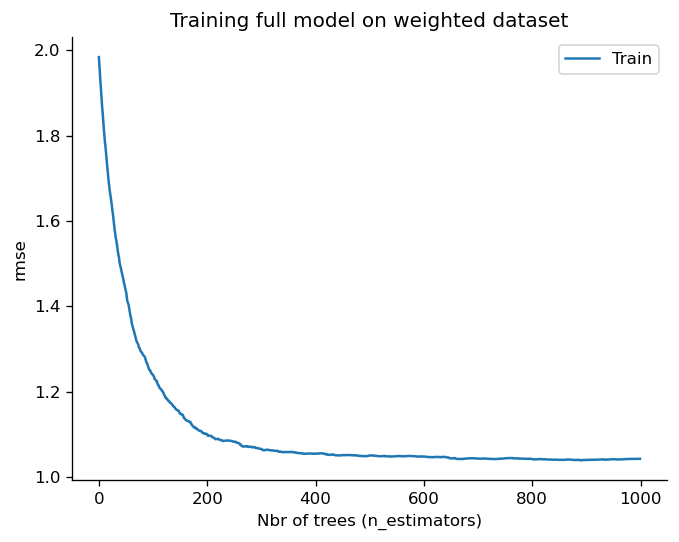

In [200]:
fig, ax = plt.subplots(dpi=120)
modules.plot_training_xgb(full_model.evals_result_, title="Training full model on weighted dataset", fig=fig, ax=ax)
plt.show()

In [201]:
y_pred = full_model.predict(oldset.X_test)
y_pred_train = full_model.predict(oldset.X_train)

Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.


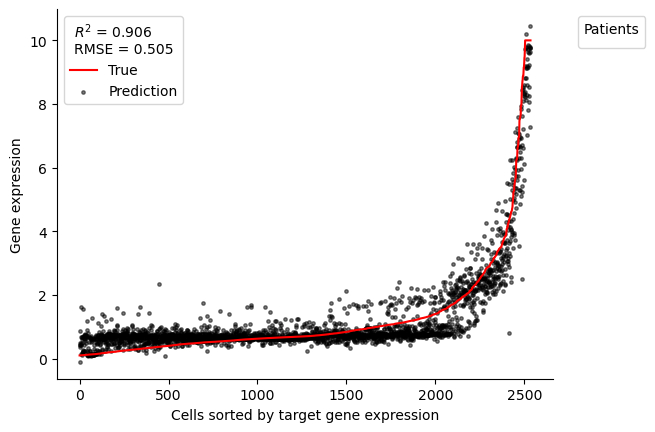

In [202]:
modules.plot_prediction(oldset.y_train.values, y_pred_train)

Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.


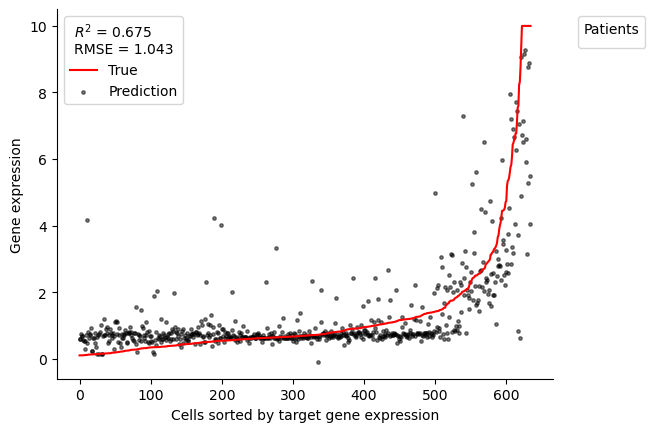

In [203]:
modules.plot_prediction(oldset.y_test.values, y_pred)

In [484]:
X_data = X[y.abs()>0.5]

In [486]:
y_data = y[y.abs()>0.5]

In [487]:
X_data = X_data[inputs]

In [600]:
val = train[-500:]
train = train[:-500]

In [601]:
test = list(set(range(len(X_data))) - set(train+val))

In [602]:
datamatrix = xgb.DMatrix(X_data.iloc[train], label=y_data.iloc[train])

In [603]:
model = xgb.XGBRegressor(**params)

In [604]:
history = model.fit(X_data.iloc[train], y_data[train], verbose=True, early_stopping_rounds = 100,
          eval_set=[(X_data.iloc[train], y_data[train]), (X_data.iloc[val], y_data[val])],)

[0]	validation_0-rmse:1.99660	validation_1-rmse:1.67712
[1]	validation_0-rmse:1.97133	validation_1-rmse:1.66164
[2]	validation_0-rmse:1.94539	validation_1-rmse:1.64277
[3]	validation_0-rmse:1.92011	validation_1-rmse:1.62745
[4]	validation_0-rmse:1.89653	validation_1-rmse:1.61231
[5]	validation_0-rmse:1.87262	validation_1-rmse:1.59841
[6]	validation_0-rmse:1.85008	validation_1-rmse:1.58524
[7]	validation_0-rmse:1.82743	validation_1-rmse:1.57154
[8]	validation_0-rmse:1.80491	validation_1-rmse:1.55852
[9]	validation_0-rmse:1.78372	validation_1-rmse:1.54567
[10]	validation_0-rmse:1.76234	validation_1-rmse:1.53292
[11]	validation_0-rmse:1.74133	validation_1-rmse:1.52066
[12]	validation_0-rmse:1.72061	validation_1-rmse:1.50691
[13]	validation_0-rmse:1.70072	validation_1-rmse:1.49495
[14]	validation_0-rmse:1.68157	validation_1-rmse:1.48467
[15]	validation_0-rmse:1.66284	validation_1-rmse:1.47144
[16]	validation_0-rmse:1.64383	validation_1-rmse:1.45963
[17]	validation_0-rmse:1.62512	validation

[144]	validation_0-rmse:0.79005	validation_1-rmse:1.03740
[145]	validation_0-rmse:0.78763	validation_1-rmse:1.03654
[146]	validation_0-rmse:0.78534	validation_1-rmse:1.03492
[147]	validation_0-rmse:0.78275	validation_1-rmse:1.03451
[148]	validation_0-rmse:0.78079	validation_1-rmse:1.03340
[149]	validation_0-rmse:0.77850	validation_1-rmse:1.03297
[150]	validation_0-rmse:0.77561	validation_1-rmse:1.03175
[151]	validation_0-rmse:0.77333	validation_1-rmse:1.03067
[152]	validation_0-rmse:0.77045	validation_1-rmse:1.02998
[153]	validation_0-rmse:0.76798	validation_1-rmse:1.02933
[154]	validation_0-rmse:0.76555	validation_1-rmse:1.02852
[155]	validation_0-rmse:0.76308	validation_1-rmse:1.02839
[156]	validation_0-rmse:0.76133	validation_1-rmse:1.02775
[157]	validation_0-rmse:0.75915	validation_1-rmse:1.02728
[158]	validation_0-rmse:0.75676	validation_1-rmse:1.02686
[159]	validation_0-rmse:0.75453	validation_1-rmse:1.02597
[160]	validation_0-rmse:0.75240	validation_1-rmse:1.02537
[161]	validati

[286]	validation_0-rmse:0.56919	validation_1-rmse:0.97665
[287]	validation_0-rmse:0.56833	validation_1-rmse:0.97672
[288]	validation_0-rmse:0.56692	validation_1-rmse:0.97665
[289]	validation_0-rmse:0.56569	validation_1-rmse:0.97618
[290]	validation_0-rmse:0.56489	validation_1-rmse:0.97609
[291]	validation_0-rmse:0.56376	validation_1-rmse:0.97614
[292]	validation_0-rmse:0.56264	validation_1-rmse:0.97598
[293]	validation_0-rmse:0.56209	validation_1-rmse:0.97635
[294]	validation_0-rmse:0.56125	validation_1-rmse:0.97645
[295]	validation_0-rmse:0.56055	validation_1-rmse:0.97651
[296]	validation_0-rmse:0.55990	validation_1-rmse:0.97666
[297]	validation_0-rmse:0.55892	validation_1-rmse:0.97625
[298]	validation_0-rmse:0.55779	validation_1-rmse:0.97629
[299]	validation_0-rmse:0.55682	validation_1-rmse:0.97604
[300]	validation_0-rmse:0.55541	validation_1-rmse:0.97549
[301]	validation_0-rmse:0.55434	validation_1-rmse:0.97522
[302]	validation_0-rmse:0.55326	validation_1-rmse:0.97520
[303]	validati

[428]	validation_0-rmse:0.45086	validation_1-rmse:0.96582
[429]	validation_0-rmse:0.44966	validation_1-rmse:0.96571
[430]	validation_0-rmse:0.44896	validation_1-rmse:0.96574
[431]	validation_0-rmse:0.44813	validation_1-rmse:0.96555
[432]	validation_0-rmse:0.44756	validation_1-rmse:0.96543
[433]	validation_0-rmse:0.44697	validation_1-rmse:0.96540
[434]	validation_0-rmse:0.44625	validation_1-rmse:0.96577
[435]	validation_0-rmse:0.44573	validation_1-rmse:0.96563
[436]	validation_0-rmse:0.44519	validation_1-rmse:0.96561
[437]	validation_0-rmse:0.44474	validation_1-rmse:0.96553
[438]	validation_0-rmse:0.44382	validation_1-rmse:0.96547
[439]	validation_0-rmse:0.44313	validation_1-rmse:0.96557
[440]	validation_0-rmse:0.44265	validation_1-rmse:0.96551
[441]	validation_0-rmse:0.44178	validation_1-rmse:0.96543
[442]	validation_0-rmse:0.44082	validation_1-rmse:0.96517
[443]	validation_0-rmse:0.44032	validation_1-rmse:0.96519
[444]	validation_0-rmse:0.43979	validation_1-rmse:0.96518
[445]	validati

[570]	validation_0-rmse:0.36559	validation_1-rmse:0.96128
[571]	validation_0-rmse:0.36499	validation_1-rmse:0.96152
[572]	validation_0-rmse:0.36420	validation_1-rmse:0.96167
[573]	validation_0-rmse:0.36361	validation_1-rmse:0.96156
[574]	validation_0-rmse:0.36305	validation_1-rmse:0.96160
[575]	validation_0-rmse:0.36237	validation_1-rmse:0.96163
[576]	validation_0-rmse:0.36197	validation_1-rmse:0.96171
[577]	validation_0-rmse:0.36149	validation_1-rmse:0.96176
[578]	validation_0-rmse:0.36093	validation_1-rmse:0.96167
[579]	validation_0-rmse:0.36042	validation_1-rmse:0.96158
[580]	validation_0-rmse:0.35979	validation_1-rmse:0.96160
[581]	validation_0-rmse:0.35936	validation_1-rmse:0.96157
[582]	validation_0-rmse:0.35912	validation_1-rmse:0.96154
[583]	validation_0-rmse:0.35875	validation_1-rmse:0.96153
[584]	validation_0-rmse:0.35797	validation_1-rmse:0.96161
[585]	validation_0-rmse:0.35774	validation_1-rmse:0.96171
[586]	validation_0-rmse:0.35746	validation_1-rmse:0.96164
[587]	validati

(<Figure size 600x400 with 1 Axes>,
 <AxesSubplot:title={'center':'Training error'}, xlabel='Nbr of trees (n_estimators)', ylabel='rmse'>)

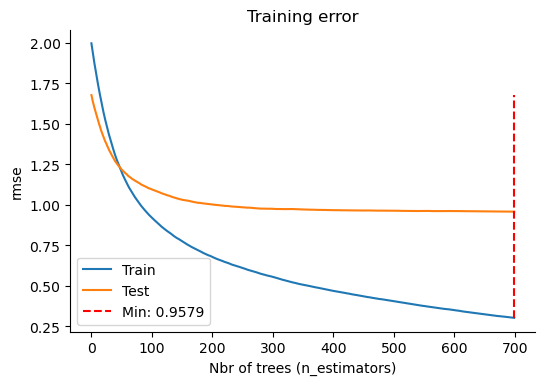

In [605]:
modules.plot_training_xgb(model.evals_result_, title="Training error")

In [606]:
pred_train = model.predict(X_data.iloc[train])
pred_val = model.predict(X_data.iloc[val])

In [755]:
pred_test = model.predict(X_data.iloc[test])

Text(0.5, 1.0, 'Results on training set')

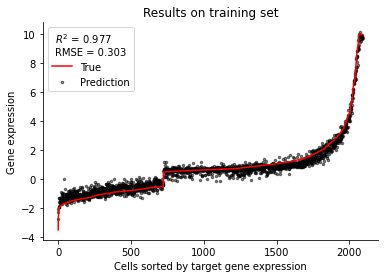

In [607]:
import matplotlib.pyplot as plt
modules.plot_prediction(y_data[train].values, pred_train)
plt.title("Results on training set")

In [700]:
y_for_plot = y_data[val].copy()

In [701]:
y_for_plot["patient_number"] = oldset_mdESR1.loc[y_for_plot.index].PatientNumber

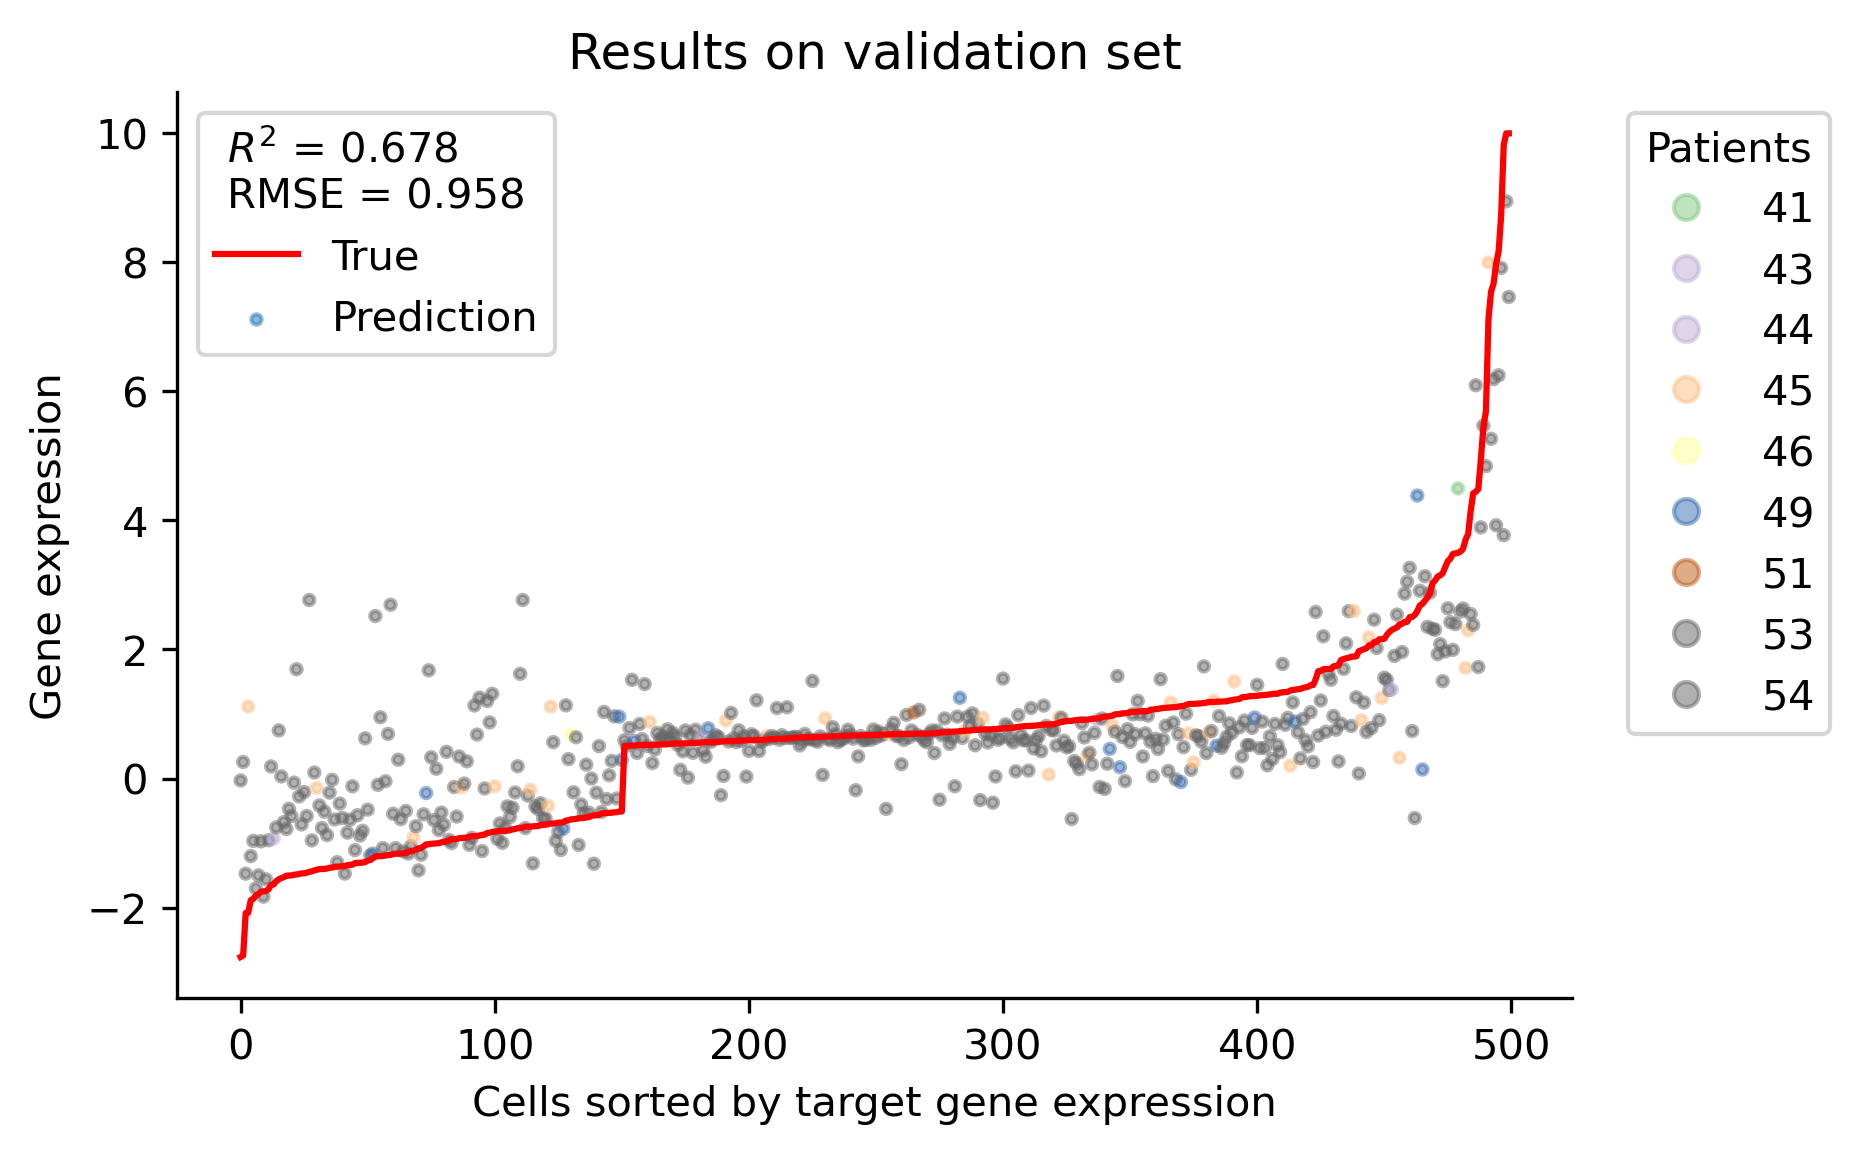

In [770]:
fig, ax = plt.subplots(dpi=300)
modules.plot_prediction(y_data[val].values, pred_val, fig=fig, ax=ax, c=y_for_plot["patient_number"].values, cmap="Accent")
plt.title("Results on validation set")
plt.savefig("/home/severs/SingleCells/plots/colored_pred_val.png")

In [760]:
y_for_plot_test = y_data[test].copy()
y_for_plot_test["patient_number"] = oldset_mdESR1.loc[y_for_plot_test.index].PatientNumber

In [ ]:
y_data

Text(0.5, 1.0, 'Results on test set')

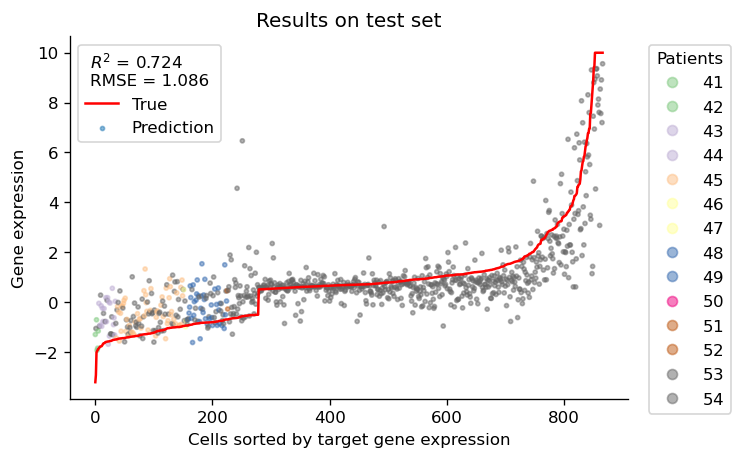

In [772]:
fig, ax = plt.subplots(dpi=120)
modules.plot_prediction(y_data[test].values, pred_test, fig=fig, ax=ax,
                        c=y_for_plot_test["patient_number"].values, cmap="Accent")
plt.title("Results on test set")
#plt.savefig("/home/severs/SingleCells/plots/colored_pred_test.png", bbox_inches="tight")

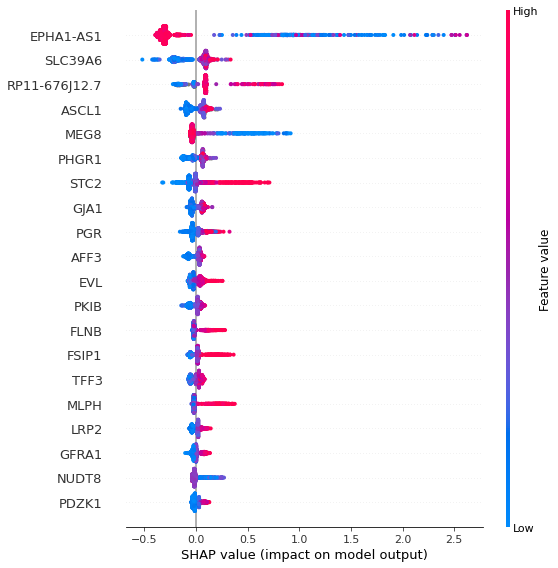

In [636]:
import shap
explainer = shap.TreeExplainer(model)
shap_vals = explainer(X_data.iloc[train])
shap.summary_plot(shap_vals, X_data.iloc[train])

The shapley values for the patient variables are all 0 and we see no patient effect

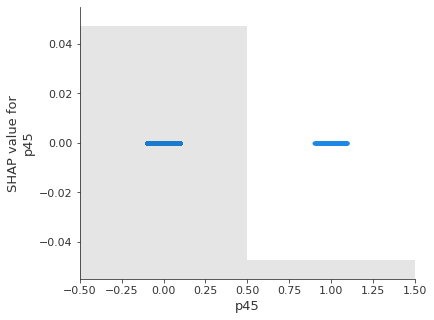

In [639]:
shap.plots.scatter(shap_vals[:, "p45"])

In [937]:
params = {
    "max_depth" :  1,
    "min_child_weight": 1,
    "subsample" : 0.8,
    "eta" : 0.02,
    "n_jobs" : 20,
    "n_estimators" : 80
}

# Predict on single patients, old data

In [ ]:
patient_models = []
r2_scores = []
mse_scores = []
pns = list(oldset_mdESR1.PatientNumber.unique())

In [683]:
from sklearn.metrics import r2_score, mean_squared_error

for pn in oldset_mdESR1.PatientNumber.unique()[-2:]:
    print(f"Fitting patient {pn}")
    y_loc_test = y[abs(y)>0.5][oldset_mdESR1.PatientNumber==pn]
    y_loc_train = y[abs(y)>0.5][oldset_mdESR1.PatientNumber!=pn]
    X_loc_test = X_old[abs(y)>0.5][oldset_mdESR1.PatientNumber==pn]
    X_loc_train = X_old[abs(y)>0.5][oldset_mdESR1.PatientNumber!=pn]
   
    model_loc = xgb.XGBRegressor(**params)
    
    model_loc.fit(X_loc_train, y_loc_train, verbose=False)
    
    y_pred = model_loc.predict(X_loc_test)
    
    score = r2_score(y_loc_test, y_pred)
    mse = mean_squared_error(y_loc_test, y_pred)
    print(f"R2: {score}\nMSE: {mse}")
    
    r2_scores.append(score)
    mse_scores.append(mse)

Fitting patient 53


Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.


R2: -18.25767141976586
MSE: 45.53135360534105
Fitting patient 54


Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.


R2: -7.103006384793183
MSE: 10.731481541966312


# Build model to predict on a single patient

In [1013]:
# Test sets include patient pn and train set includes all other patients. 
pn=45
y_loc_test = y[abs(y)>0.5][oldset_mdESR1.PatientNumber==pn]
y_loc_train = y[abs(y)>0.5][oldset_mdESR1.PatientNumber!=pn]
X_loc_test = X_old[abs(y)>0.5][oldset_mdESR1.PatientNumber==pn]
X_loc_train = X_old[abs(y)>0.5][oldset_mdESR1.PatientNumber!=pn]

inputs_loc = list(set(select_inputs(X_loc_train, y_loc_train, p=0.000001)))

X_loc_train = X_loc_train[inputs_loc]
X_loc_test = X_loc_test[inputs_loc]

Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.


  0%|          | 0/19369 [00:00<?, ?it/s]

In [1019]:
params["n_estimators"] = 300

In [1020]:
model_loc = xgb.XGBRegressor(**params)

history = model_loc.fit(X_loc_train, y_loc_train, verbose=True,
          eval_set=[(X_loc_train, y_loc_train), (X_loc_test, y_loc_test)],)

y_pred = model_loc.predict(X_loc_test)

score = r2_score(y_loc_test, y_pred)
mse = mean_squared_error(y_loc_test, y_pred)
print(f"R2: {score}\nMSE: {mse}")

[0]	validation_0-rmse:1.84873	validation_1-rmse:3.31569
[1]	validation_0-rmse:1.83931	validation_1-rmse:3.29659
[2]	validation_0-rmse:1.83004	validation_1-rmse:3.26762
[3]	validation_0-rmse:1.82200	validation_1-rmse:3.24276
[4]	validation_0-rmse:1.81376	validation_1-rmse:3.23939
[5]	validation_0-rmse:1.80535	validation_1-rmse:3.21374
[6]	validation_0-rmse:1.79764	validation_1-rmse:3.21402
[7]	validation_0-rmse:1.79001	validation_1-rmse:3.19071
[8]	validation_0-rmse:1.78229	validation_1-rmse:3.17699
[9]	validation_0-rmse:1.77460	validation_1-rmse:3.15260
[10]	validation_0-rmse:1.76709	validation_1-rmse:3.12783
[11]	validation_0-rmse:1.76019	validation_1-rmse:3.10554
[12]	validation_0-rmse:1.75332	validation_1-rmse:3.07599
[13]	validation_0-rmse:1.74673	validation_1-rmse:3.05832
[14]	validation_0-rmse:1.73963	validation_1-rmse:3.05869
[15]	validation_0-rmse:1.73285	validation_1-rmse:3.04051
[16]	validation_0-rmse:1.72671	validation_1-rmse:3.04094
[17]	validation_0-rmse:1.72080	validation

[144]	validation_0-rmse:1.32970	validation_1-rmse:2.23489
[145]	validation_0-rmse:1.32801	validation_1-rmse:2.23610
[146]	validation_0-rmse:1.32641	validation_1-rmse:2.23254
[147]	validation_0-rmse:1.32482	validation_1-rmse:2.23349
[148]	validation_0-rmse:1.32314	validation_1-rmse:2.23326
[149]	validation_0-rmse:1.32146	validation_1-rmse:2.23316
[150]	validation_0-rmse:1.31980	validation_1-rmse:2.23298
[151]	validation_0-rmse:1.31832	validation_1-rmse:2.23160
[152]	validation_0-rmse:1.31667	validation_1-rmse:2.23296
[153]	validation_0-rmse:1.31517	validation_1-rmse:2.23284
[154]	validation_0-rmse:1.31374	validation_1-rmse:2.25538
[155]	validation_0-rmse:1.31219	validation_1-rmse:2.25677
[156]	validation_0-rmse:1.31064	validation_1-rmse:2.25896
[157]	validation_0-rmse:1.30914	validation_1-rmse:2.25681
[158]	validation_0-rmse:1.30745	validation_1-rmse:2.25681
[159]	validation_0-rmse:1.30595	validation_1-rmse:2.25423
[160]	validation_0-rmse:1.30455	validation_1-rmse:2.27903
[161]	validati

[286]	validation_0-rmse:1.16819	validation_1-rmse:2.24611
[287]	validation_0-rmse:1.16738	validation_1-rmse:2.24767
[288]	validation_0-rmse:1.16658	validation_1-rmse:2.24539
[289]	validation_0-rmse:1.16575	validation_1-rmse:2.24477
[290]	validation_0-rmse:1.16492	validation_1-rmse:2.24334
[291]	validation_0-rmse:1.16413	validation_1-rmse:2.24069
[292]	validation_0-rmse:1.16331	validation_1-rmse:2.24154
[293]	validation_0-rmse:1.16255	validation_1-rmse:2.24133
[294]	validation_0-rmse:1.16176	validation_1-rmse:2.24071
[295]	validation_0-rmse:1.16094	validation_1-rmse:2.23988
[296]	validation_0-rmse:1.16019	validation_1-rmse:2.23968
[297]	validation_0-rmse:1.15952	validation_1-rmse:2.23915
[298]	validation_0-rmse:1.15875	validation_1-rmse:2.23908
[299]	validation_0-rmse:1.15798	validation_1-rmse:2.23693
R2: 0.35400827892863995
MSE: 5.003866139150757


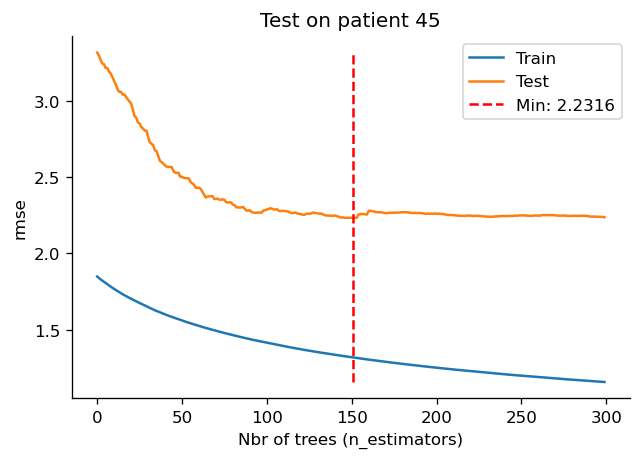

In [1021]:
fig, ax = plt.subplots(1,1, dpi=120)
modules.plot_training_xgb(model_loc.evals_result_, title="Test on patient 45", fig=fig, ax=ax)
plt.savefig("/home/severs/SingleCells/plots/train_prog_pn49.png")

Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.


Text(0.5, 1.0, 'Results on patient 53')

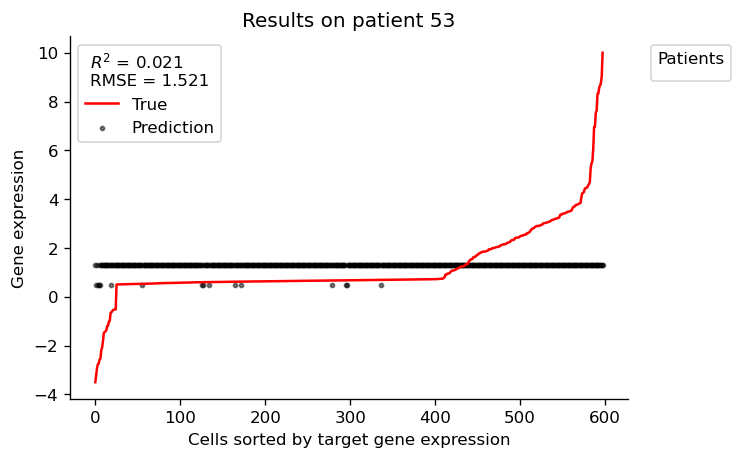

In [1012]:
fig, ax = plt.subplots(dpi=120)
modules.plot_prediction(y_loc_test, y_pred, fig=fig, ax=ax)
plt.title("Results on patient 53")
#plt.savefig("/home/severs/SingleCells/plots/pred_on_pn53.png", bbox_inches="tight")

# Train on entire dataset

In [1022]:
params

{'max_depth': 1,
 'min_child_weight': 1,
 'subsample': 0.8,
 'eta': 0.02,
 'n_jobs': 20,
 'n_estimators': 300}

In [1069]:
weights = ((abs(y)>0.5).values+1)/2

In [1079]:
strat_y = (abs(y)>0.5).values+1-1

In [1051]:
from sklearn.model_selection import StratifiedKFold

In [1055]:
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1234)

In [1080]:
split = folds.split(X, strat_y)

In [1099]:
X_diff = X[abs(y)>0.5]
y_diff = y[abs(y)>0.5]

In [1100]:
datamatrix = xgb.DMatrix(X_diff, label=y_diff)

In [ ]:
cv_results = pd.DataFrame()
for i, n_est in enumerate(range(50,1000,150)):
    params["n_estimators"] = n_est
    res = xgb.cv(params, datamatrix,
                       num_boost_round=params["n_estimators"],
                       nfold=10,
                       #folds = folds.split(X, strat_y),
                       metrics="rmse")
    cv_results = cv_results.append(res.iloc[-1])
    print(f"\n\n\nRESULT\n n_est:{n_est}      rmse: {res.iloc[-1,2]}\n\n\n\n\n")
cv